# Tarea S13
# Isaac Mendez Barquero
# Kevin Porras Alpizar

## 1.1 Simulación del modelo Ising

In [6]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [17]:
def CrearEspines(nEspines, opcion):
    """ Con el parametro 'opcion' se indica el tipo de configuracion inicial deseada:
    1. Ordenada, espines fríos hacia arriba
    2. Ordenada, espines fríos hacia abajo.
    3. Desordanada, espines aleatorios.
    """ 
    if opcion == 1:
        arreglo_Espines = np.ones(nEspines)
    elif opcion == 2:
        arreglo_Espines = np.ones(nEspines)*-1
    elif opcion == 3:
        arreglo_Espines = 2*np.random.randint(2, size=nEspines) - 1
    arreglo_Espines[nEspines-1] = arreglo_Espines[0]
    return arreglo_Espines

def CalcularEnergia(nEspines, arreglo):
    # Se calcula la energia con J = 1
    energia = 0
    for j in range(nEspines-1):
        energia += -arreglo[j]*arreglo[j+1]
    return energia

def ListaEspines(nPasos, nEspines, opcion):
    KbT = 1
    arreglo = CrearEspines(nEspines, opcion)
    arreglo_copia = arreglo.copy()
    lista = []

    for k in range(nPasos):
        lista.append(arreglo)
        espin_escogido = np.random.randint(nEspines) # Variable que determina que espin se va a variar
        arreglo_copia[espin_escogido] = arreglo_copia[espin_escogido]*-1
        energia_vieja = CalcularEnergia(nEspines, arreglo)
        energia_nueva = CalcularEnergia(nEspines,arreglo_copia)

        if energia_nueva <= energia_vieja:
            arreglo = arreglo_copia.copy()

        else:
            if random() < np.exp((energia_nueva-energia_vieja)/(KbT)):
                arreglo = arreglo_copia.copy()

            else:
                arreglo_copia = arreglo.copy()

    lista = np.transpose(lista)
    return lista

### Inciso A

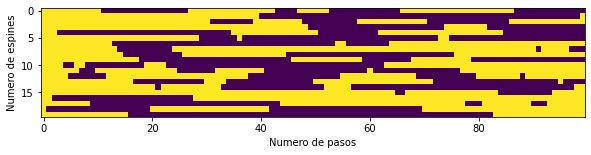

In [18]:
# Para 20 espines y 100 pasos

plt.figure(figsize=(20,2))
plt.imshow(ListaEspines(100,20, 1))
plt.xlabel('Numero de pasos')
plt.ylabel('Numero de espines')
#plt.title('Modelo Ising con configuracion inicial fria (espines hacia arriba)')
plt.savefig('20_pasos.png', bbox_inches='tight')

### Inciso C

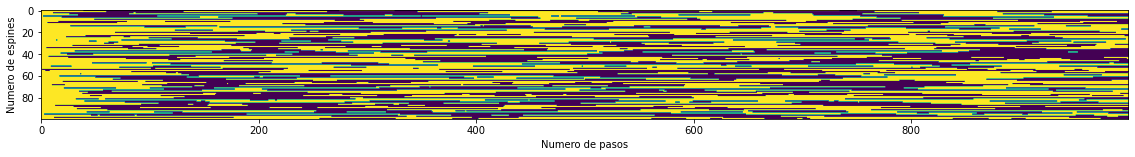

In [19]:
# Para 100 espines, 1000 pasos y espines iniciales hacia arriba

plt.figure(figsize=(20,2))
plt.imshow(ListaEspines(1000,100, 1))
plt.xlabel('Numero de pasos')
plt.ylabel('Numero de espines')
#plt.title('Modelo Ising con configuracion inicial fria (espines hacia arriba)')
plt.savefig('arriba.png', bbox_inches='tight')

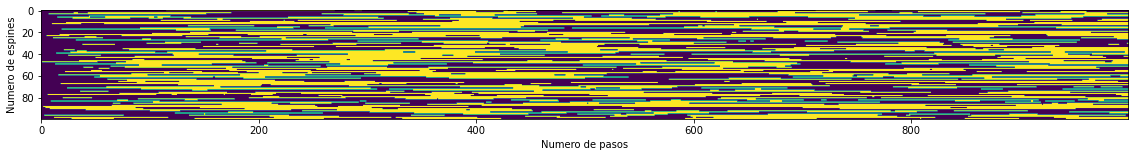

In [20]:
# Para 100 espines, 1000 pasos y espines iniciales hacia abajo

plt.figure(figsize=(20,2))
plt.imshow(ListaEspines(1000,100, 2))
plt.xlabel('Numero de pasos')
plt.ylabel('Numero de espines')
#plt.title('Modelo Ising con configuracion inicial fria (espines hacia abajo)')
plt.savefig('abajo.png', bbox_inches='tight')

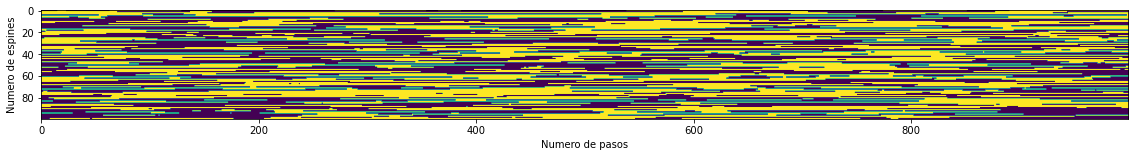

In [21]:
# Para 100 espines, 1000 pasos y espines iniciales aleatorios

plt.figure(figsize=(20,2))
plt.imshow(ListaEspines(1000,100, 3))
plt.xlabel('Numero de pasos')
plt.ylabel('Numero de espines')
#plt.title('Modelo Ising con configuracion inicial caliente (espines aleatorios)')
plt.savefig('aleatorios.png', bbox_inches='tight')

## 1.2. Propiedades termodinamicas del modelo Ising

In [92]:
# La principal diferencia con la seccion 1.1 es que se implementan 3 funciones para calcular M, U y C.

def CrearEspines(nEspines, opcion):
    """ Con el parametro 'opcion' se indica el tipo de configuracion inicial deseada:
    1. Ordenada, espines fríos hacia arriba
    2. Ordenada, espines fríos hacia abajo.
    3. Desordanada, espines aleatorios.
    """ 
    if opcion == 1:
        arreglo_Espines = np.ones(nEspines)
    elif opcion == 2:
        arreglo_Espines = np.ones(nEspines)*-1
    elif opcion == 3:
        arreglo_Espines = 2*np.random.randint(2, size=nEspines) - 1
    arreglo_Espines[nEspines-1] = arreglo_Espines[0]
    return arreglo_Espines

def CalcularEnergia(nEspines, arreglo):
    # Se calcula la energia con J = 1
    energia = 0
    for j in range(nEspines-1):
        energia += -arreglo[j]*arreglo[j+1]
    return energia

def ListaEspines(nPasos, nEspines, opcion):
    KbT = 1
    arreglo = CrearEspines(nEspines, opcion)
    arreglo_copia = arreglo.copy()
    lista = []

    for k in range(nPasos):
        lista.append(arreglo)
        espin_escogido = np.random.randint(nEspines) # Variable que determina que espin se va a variar
        arreglo_copia[espin_escogido] = arreglo_copia[espin_escogido]*-1
        energia_vieja = CalcularEnergia(nEspines, arreglo)
        energia_nueva = CalcularEnergia(nEspines,arreglo_copia)

        if energia_nueva <= energia_vieja:
            arreglo = arreglo_copia.copy()

        else:
            if random() < np.exp((energia_nueva-energia_vieja)/(KbT)):
                arreglo = arreglo_copia.copy()

            else:
                arreglo_copia = arreglo.copy()

    lista = np.transpose(lista)
    return lista

def calcularMagnetizacion(configuracion):
    M = np.abs(np.sum(configuracion))
    return M

def calcularEnergiaInterna(nEspines, configuracion):
    energia = CalcularEnergia(nEspines, configuracion)
    sumaEnergia = 0
    for i in range(nEspines):
        random = round(np.random.exponential())
        sumaEnergia += energia[random]
    energiaInterna = sumaEnergia/nEspines
    return energiaInterna
    
def calcularCalor(nEspines, configuracion, temperatura):
    energia = CalcularEnergia(nEspines, configuracion)
    sumaEnergia = 0
    sumaEnergia_2 = 0
    for i in range(nEspines):
        random = round(np.random.exponential())
        sumaEnergia += energia[random]
        sumaEnergia_2 += energia[random]**2    # es la suma de cada energia pero al cuadrado
    calor = (sumaEnergia_2/nEspines - (sumaEnergia/nEspines)**2)/((nEspines**2)*(temperatura**2))
    return calor

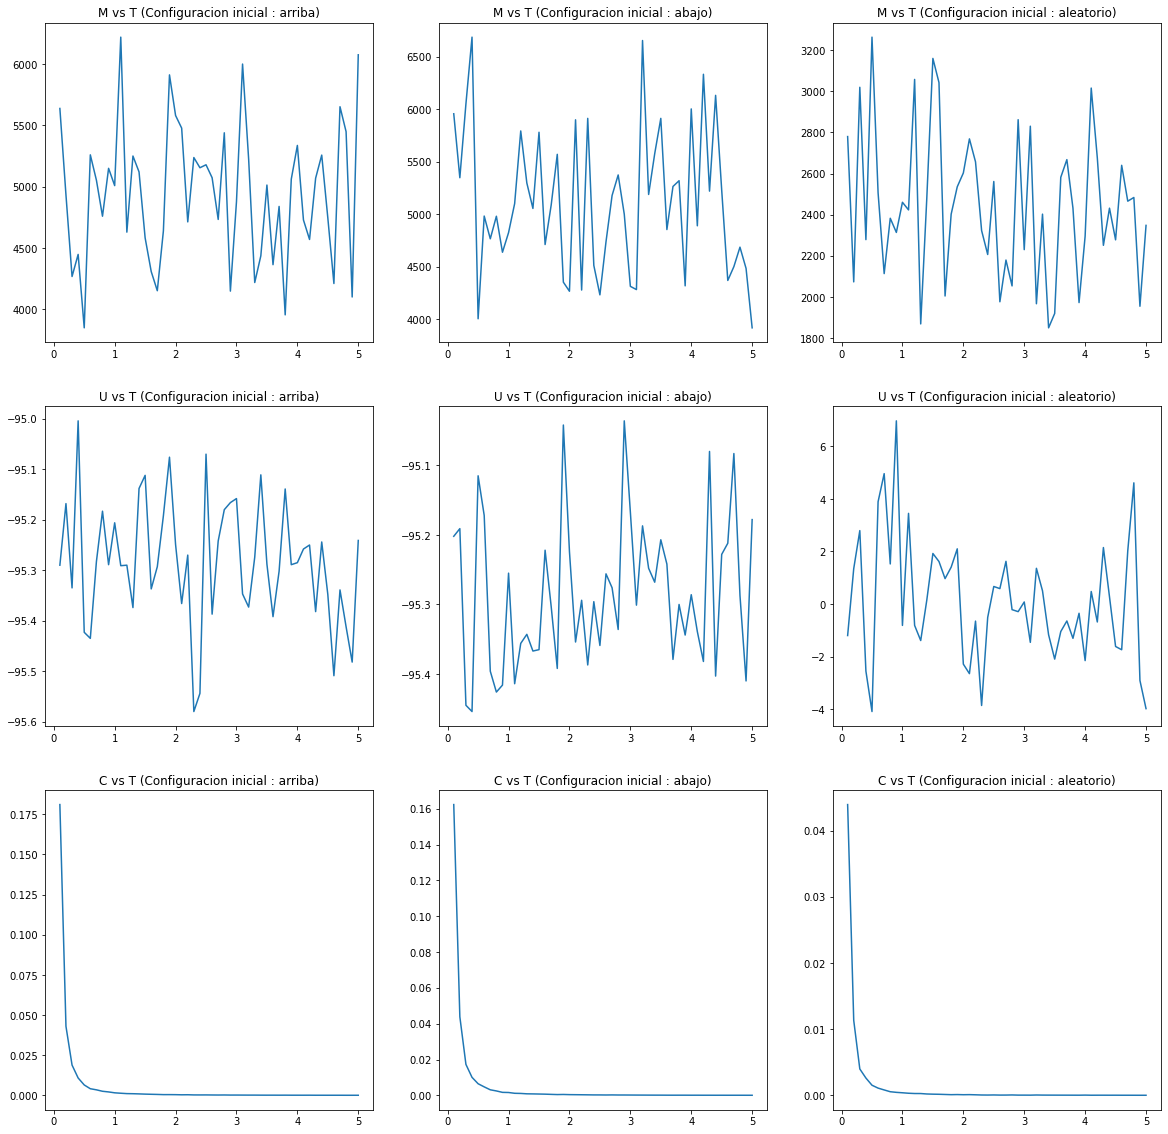

In [103]:
# Se calcula para espines frios hacia arriba, hacia abajo y espines aleatorios:
# la magentizacion, energia interna y calor 20 veces y se obtiene el promedio para un rango de temperaturas de 0 a 5 
# (ignorando unidades por simplicidad).
# Todos los calculos se realizan con 100 espines y 1000 pasos.

temperatura = np.linspace(0.1,5,50)

M_up = np.array([])
U_up = np.array([])
C_up = np.array([])

M_down = np.array([])
U_down = np.array([])
C_down = np.array([])

M_rand = np.array([])
U_rand = np.array([])
C_rand = np.array([])

for T in temperatura:
    m_up = 0
    u_up = 0
    c_up = 0
    
    m_down = 0
    u_down = 0
    c_down = 0
    
    m_rand = 0
    u_rand = 0
    c_rand = 0
    for i in range(20):
        configuracion_up = ListaEspines(1000, 100, 1)
        m_up += calcularMagnetizacion(configuracion_up)
        u_up += calcularEnergiaInterna(100, configuracion_up)
        c_up += calcularCalor(100, configuracion_up, T)
        
        configuracion_down = ListaEspines(1000, 100, 2)
        m_down += calcularMagnetizacion(configuracion_down)
        u_down += calcularEnergiaInterna(100, configuracion_down)
        c_down += calcularCalor(100, configuracion_down, T)
        
        configuracion_rand = ListaEspines(1000, 100, 3)
        m_rand += calcularMagnetizacion(configuracion_rand)
        u_rand += calcularEnergiaInterna(100, configuracion_rand)
        c_rand += calcularCalor(100, configuracion_rand, T)
    M_up = np.append(M_up, m_up/20)
    U_up = np.append(U_up, u_up/20)
    C_up = np.append(C_up, c_up/20)
    
    M_down = np.append(M_down, m_down/20)
    U_down = np.append(U_down, u_down/20)
    C_down = np.append(C_down, c_down/20)
    
    M_rand = np.append(M_rand, m_rand/20)
    U_rand = np.append(U_rand, u_rand/20)
    C_rand = np.append(C_rand, c_rand/20)
    
fig,((ax1,ax4,ax7), (ax2,ax5,ax8), (ax3,ax6,ax9)) = plt.subplots(nrows = 3,ncols= 3,figsize = (20,20))

ax1.set_title("M vs T (Configuracion inicial : arriba)")
ax1.plot(temperatura, M_up)

ax2.set_title("U vs T (Configuracion inicial : arriba)")
ax2.plot(temperatura, U_up)

ax3.set_title("C vs T (Configuracion inicial : arriba)")
ax3.plot(temperatura, C_up)

ax4.set_title("M vs T (Configuracion inicial : abajo)")
ax4.plot(temperatura, M_down)

ax5.set_title("U vs T (Configuracion inicial : abajo)")
ax5.plot(temperatura, U_down)

ax6.set_title("C vs T (Configuracion inicial : abajo)")
ax6.plot(temperatura, C_down)

ax7.set_title("M vs T (Configuracion inicial : aleatorio)")
ax7.plot(temperatura, M_rand)

ax8.set_title("U vs T (Configuracion inicial : aleatorio)")
ax8.plot(temperatura, U_rand)

ax9.set_title("C vs T (Configuracion inicial : aleatorio)")
ax9.plot(temperatura, C_rand)

fig.savefig('M_U_C.png', bbox_inches='tight')